## Testing for `hopsy` with random data

In [1]:
import hopsy
import numpy as np

In [2]:
# the polytope is defined as
#          P := {x : Ax <= b}
# thus we need to define A and b. these constraints form the simple box [0,1]^2.
A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
b = np.array([[1], [1], [0], [0]]);

# next we define our target distribution as an isotropic Gaussian with mean 0 and
# identity covariance.
mu = np.zeros((2,1))
cov = np.identity(2)

model = hopsy.MultivariateGaussianModel(mu, cov)

# the complete problem is defined by the target distribution and the constrained domain,
# defined by the above mentioned inequality
problem = hopsy.Problem(A, b, model)

In [3]:
# the run object contains and constructs the markov chains. in the default case, the
# Run object will have a single chain using the Hit-and-Run proposal algorithm and is
# set to produce 10,000 samples.
run = hopsy.Run(problem)

# we finally sample
run.sample()

Academic license - for non-commercial use only - expires 2021-11-23
Using license file /opt/gurobi912/gurobi.lic


In [4]:
# from the run, we can now extract the produced data
data = run.data

# the states is a list of lists of numpy.ndarrays, which can be casted to a numpy.ndarray
# which then has the shape (m,n,d), where m is the number of chains, n the number of samples
# and d the dimenion
states  = data.states

Now we neend to plot 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The `states` variable is a **list** of arrays. 
Usint the `pandas` library we can make a `DataFrame` out of it. 

In [6]:
df_data = pd.DataFrame(np.concatenate(states))
df_data

,0,1
0,0.527353,0.882257
1,0.983544,0.895377
2,0.966116,0.957163
3,0.511486,0.989361
4,0.868993,0.870392
...,...,...
995,0.175812,0.310576
996,0.609898,0.302661
997,0.280251,0.934239
998,0.008388,0.689737


### Some visualizations 

<AxesSubplot:ylabel='Count'>

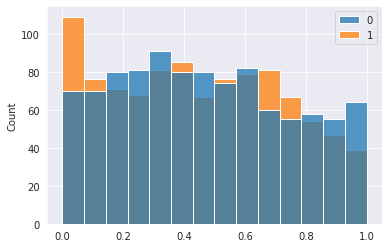

In [7]:
sns.set_style('darkgrid')
sns.histplot(df_data)

A better visualization. 

In [8]:
df_data = pd.DataFrame(np.concatenate(states), columns=['x', 'y'])
df_data

,x,y
0,0.527353,0.882257
1,0.983544,0.895377
2,0.966116,0.957163
3,0.511486,0.989361
4,0.868993,0.870392
...,...,...
995,0.175812,0.310576
996,0.609898,0.302661
997,0.280251,0.934239
998,0.008388,0.689737


In [9]:
x = df_data["x"]
y = df_data["y"]

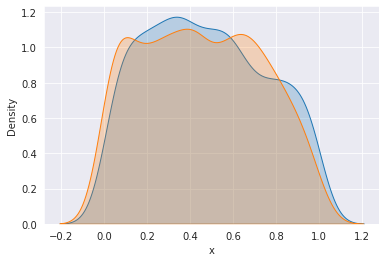

In [10]:
for col in 'xy':
    sns.kdeplot(df_data[col], shade=True)

### Plotting joint and marginal distributions

The first is `jointplot()`, which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. 

By default, `jointplot()` represents the bivariate distribution using `scatterplot()` and the marginal distributions using `histplot()`

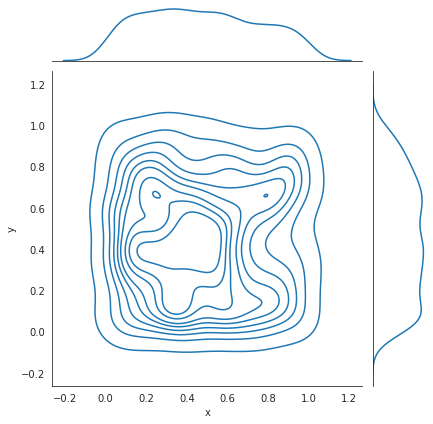

In [11]:
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='kde');

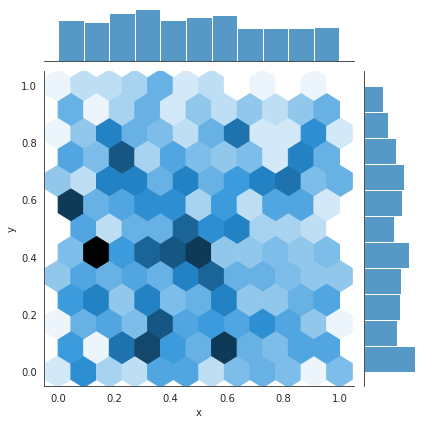

In [12]:
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex')

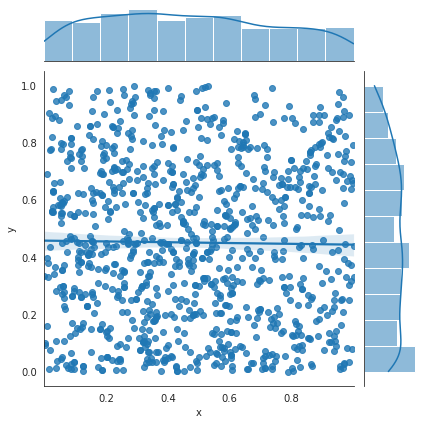

In [13]:
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='reg')

## Testing for `PolyRound` using a BIGG model

In [14]:
import os
from PolyRound.api import PolyRoundApi
from PolyRound.static_classes.lp_utils import ChebyshevFinder
from PolyRound.settings import PolyRoundSettings
from pathlib import Path

In [15]:
model_path = "/home/haris/Desktop/polyround_SI/PolyRound/PolyRound/models/e_coli_core.xml"

In [16]:
# Create a settings object with the default settings.
settings = PolyRoundSettings()

In [17]:
settings.backend

'gurobi'

In [18]:
settings.check_lps

False

In [19]:
settings.hp_flags

{'FeasibilityTol': 1e-09, 'OptimalityTol': 1e-08}

In [20]:
settings.presolve

False

In [21]:
settings.reduce

True

In [22]:
# Import model and create Polytope object
polytope = PolyRoundApi.sbml_to_polytope(model_path)

In [23]:
polytope.A.shape

(190, 95)

In [78]:
polytope.S

,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
13dpg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6pgc_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6pgl_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s7p_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
succ_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
succ_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
succoa_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
print(type(polytope.h))
print(polytope.h.shape)
print(polytope.h)

<class 'pandas.core.series.Series'>
(72,)
13dpg_c      0.0
2pg_c        0.0
3pg_c        0.0
6pgc_c       0.0
6pgl_c       0.0
            ... 
s7p_c        0.0
succ_c       0.0
succ_e       0.0
succoa_c     0.0
xu5p__D_c    0.0
Length: 72, dtype: float64


From the documentation of the class `Polytope` on `PolyRound`:
    
Polytope class which holds a set of: 

* inequality constraints: $Ax<=b$
* and equality constraints: $Sx=h$

$A$ and $S$ are Pandas Dataframes and $b$ and $h$ are Pandas Series. 

Column names of $A$ and $S$ are the reaction names (preserved). 

The polytope can be transformed with `apply_shift` and `apply_transformation`. 

Each of these transformations applied are stored in the attributes `shift` and `transformation`, 
allowing to back transform points `x` to the original space using the method `back_transform`.

In [25]:
# Remove redundant constraints and refunction inequality constraints that are de-facto equalities.
# Due to these inequalities, the polytope is empty (distance from chebyshev center to boundary is zero)
x, dist = ChebyshevFinder.chebyshev_center(polytope, settings)

# Is x the point ? ? ?  
print(x.shape)
print(dist)

(95, 1)
[0.]


In [26]:
simplified_polytope = PolyRoundApi.simplify_polytope(polytope)

In [77]:
simplified_polytope.S

,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
13dpg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0
2pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0
3pg_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0
6pgc_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0
6pgl_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s7p_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,-0.707107,0.0,0.707107,0.00000,0.0
succ_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.408248,-0.408248,-0.408248,-0.408248,0.000000,0.0,0.000000,0.00000,0.0
succ_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-0.577350,0.577350,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0
succoa_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.707107,0.000000,0.0,0.000000,0.00000,0.0


**Question:** How can it be to add rows in $S$ ? 

In [28]:
simplified_polytope.A.shape

(36, 95)

In [29]:
# The simplified polytope has non-zero border distance
x, dist = ChebyshevFinder.chebyshev_center(simplified_polytope, settings)
print(dist)

[0.58198972]


In [30]:
transformed_polytope = PolyRoundApi.transform_polytope(simplified_polytope)

In [31]:
# The distance from the chebyshev center to the boundary changes in the new coordinate system
x, dist = ChebyshevFinder.chebyshev_center(transformed_polytope, settings)
print(dist)

[2.94777315]


In [32]:
rounded_polytope = PolyRoundApi.round_polytope(transformed_polytope)

# After rounding, the distance from the chebyshev center to the boundary is set to be close to 1
x, dist = ChebyshevFinder.chebyshev_center(rounded_polytope, settings)
print(dist)

# The chebyshev center can be back transformed into an interior point in the simplified space.
print(simplified_polytope.border_distance(rounded_polytope.back_transform(x)))


[1.00000001]
0.03925295155234657


In [33]:
# simplify, transform and round in one call
one_step_rounded_polytope = PolyRoundApi.simplify_transform_and_round(polytope)

In [34]:
"""
# Here are the features of the one_step_rounded_polytope object
# These features stand for any polytope object of the PolyRound

one_step_rounded_polytope.A                     ==>  The A matrix

one_step_rounded_polytope.b                     ==>  The b vector

one_step_rounded_polytope.S                     ==>  The stoichiometric matrix

one_step_rounded_polytope.apply_shift           ==>  Shifts Polytope region without altering the shape

one_step_rounded_polytope.apply_transformation  ==>  Applies transformation matrix to Polytope. 
                                                     If non-symmetric transformation, assumes reduction to 
                                                     system of only inequlity constraints (not checked).
                                                     :param transformation: Numpy Array or Pandas Dataframe

one_step_rounded_polytope.back_transform        ==>  Backtransforms x to the original space of the Polytope.
                                                     :param x: Numpy array

one_step_rounded_polytope.border_distance       ==>  Computes shortest distance from x to polytope border

one_step_rounded_polytope.copy                  ==>  Deep copy of Polytope.

one_step_rounded_polytope.h                     ==>  a flux vector MAYBE...? 

one_step_rounded_polytope.inequality_only       ==>

one_step_rounded_polytope.normalize             ==>  Normalizes each row sum of self.A to 1. 
                                                     Does not change feasible space.

one_step_rounded_polytope.normalize_system      ==>  staticmethod: A = (A.T / row_norm).T where
                                                     row_norm = np.linalg.norm(A, axis=1)

one_step_rounded_polytope.remove_zero_rows      ==>  staticmethod: 

one_step_rounded_polytope.shift                 ==>  attribute: initially the zero vector. 

one_step_rounded_polytope.transformation        ==>  attribute: 
"""

'\n# Here are the features of the one_step_rounded_polytope object\n# These features stand for any polytope object of the PolyRound\n\none_step_rounded_polytope.A\n\none_step_rounded_polytope.apply_shift\n\none_step_rounded_polytope.b\n\none_step_rounded_polytope.back_transform    ==> Backtransforms x to the original space of the Polytope.\n                                                :param x: Numpy array\none_step_rounded_polytope.border_distance   ==>\n\none_step_rounded_polytope.copy              ==>\n\none_step_rounded_polytope.h                 ==>\n\none_step_rounded_polytope.inequality_only   ==>\n\none_step_rounded_polytope.normalize         ==>  Normalizes each row sum of self.A to 1. \n                                                 Does not change feasible space.\none_step_rounded_polytope.normalize_system  ==>\n\none_step_rounded_polytope.remove_zero_rows  ==>\n\none_step_rounded_polytope.S                 ==>\n\none_step_rounded_polytope.shift             ==>\n\none_s

In [35]:
#save to hdf5
out_hdf5 = "/home/haris/Desktop/rounded_e_coli_core.hdf5"
PolyRoundApi.polytope_to_hdf5(one_step_rounded_polytope, out_hdf5)

#save to csv
out_csv_dir = "/home/haris/Desktop/testing_polyround_algo"
Path(out_csv_dir).mkdir(parents=True, exist_ok=True)
PolyRoundApi.polytope_to_csvs(one_step_rounded_polytope, out_csv_dir)


In [36]:
# Special use case: remove redundant constraints without removing zero facettes. 
# This will leave th polytope with its original border distance.
x, dist = ChebyshevFinder.chebyshev_center(polytope, settings)
print(dist)
settings.simplify_only = True
simplified_polytope = PolyRoundApi.simplify_polytope(polytope, settings=settings)

# The simplified polytope still has zero border distance
x, dist = ChebyshevFinder.chebyshev_center(simplified_polytope, settings)
print(dist)


[0.]
[0.]


## Sampling using `hopsy` after rounding with `PolyRound`

In [37]:
one_step_rounded_polytope.A.shape

(36, 24)

In [38]:
one_step_rounded_polytope.b.shape

(36,)

In [39]:
problem = hopsy.Problem(one_step_rounded_polytope.A, one_step_rounded_polytope.b, model)

In [40]:
run = hopsy.Run(problem)
# we finally sample
run.sample()

In [41]:
data = run.data

# the states is a list of lists of numpy.ndarrays, which can be casted to a numpy.ndarray
# which then has the shape (m,n,d), where m is the number of chains, n the number of samples
# and d the dimenion
states  = data.states

In [42]:
print(type(states[0][0]))
print(states[0][0].shape)

<class 'numpy.ndarray'>
(24,)


We now need to map backwards the samples in the initial polytope... 

In [43]:
non_mapped_samples = np.concatenate(states)

In [44]:
non_mapped_samples.shape

(1000, 24)

In [46]:
mapped_samples = one_step_rounded_polytope.back_transform(non_mapped_samples.T)

In [ ]:
one_step_rounded_polytope.

In [52]:
mapped_samples.shape

(95, 1000)

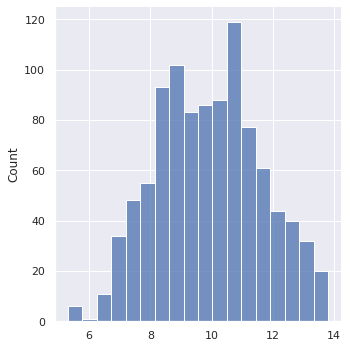

In [57]:
sns.set_theme(style="darkgrid")
df = mapped_samples[4]
sns.displot(
    df
)

**I am really not sure that I am doing this right....**